In [63]:
"""
# House Price Prediction using Linear Regression

## Step 1: Import Required Libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
"""
## Step 2: Load and Inspect the Dataset
"""
data = pd.read_csv("../dataset/Housing.csv")

In [65]:
# Display first few rows to understand the data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [66]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [67]:
# Display all column names
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [68]:
# Display total rows and columns
data.shape

(545, 13)

### Data Preprocessing

In [69]:
## Step 3: Data Preprocessing
# Check for missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
# Basic Statistical Analysis
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [71]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [72]:
# Renaming columns for better readability
data.rename(columns={
    "price": "House_Price",
    "area": "Area_sqft",
    "bedrooms": "Bedrooms",
    "bathrooms": "Bathrooms",
    "stories": "Stories",
    "mainroad": "Main_Road_Access",
    "guestroom": "Guest_Room_Available",
    "basement": "Basement_Available",
    "hotwaterheating": "Hot_Water_Heating",
    "airconditioning": "Air_Conditioning",
    "parking": "Parking_Spaces",
    "prefarea": "Preferred_Location",
    "furnishingstatus": "Furnishing_Status"
}, inplace=True)

In [73]:
data.columns

Index(['House_Price', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Stories',
       'Main_Road_Access', 'Guest_Room_Available', 'Basement_Available',
       'Hot_Water_Heating', 'Air_Conditioning', 'Parking_Spaces',
       'Preferred_Location', 'Furnishing_Status'],
      dtype='object')

In [74]:
# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

numerical_columns = data.select_dtypes(include=['int64']).columns
print(numerical_columns)

Index(['Main_Road_Access', 'Guest_Room_Available', 'Basement_Available',
       'Hot_Water_Heating', 'Air_Conditioning', 'Preferred_Location',
       'Furnishing_Status'],
      dtype='object')
Index(['House_Price', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Stories',
       'Parking_Spaces'],
      dtype='object')


In [75]:
# Separate target variable
target = 'House_Price'

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
encoded_cats = encoder.fit_transform(data[categorical_columns])

# Convert encoded features to DataFrame
encoded_cats_data = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate numerical and encoded categorical features
X = pd.concat([data[numerical_columns], encoded_cats_data], axis=1)
y = data[target]  # Target variable

In [76]:
# Display processed dataset
print(X.head())
print(y.head()) 

   House_Price  Area_sqft  Bedrooms  Bathrooms  Stories  Parking_Spaces  \
0     13300000       7420         4          2        3               2   
1     12250000       8960         4          4        4               3   
2     12250000       9960         3          2        2               2   
3     12215000       7500         4          2        2               3   
4     11410000       7420         4          1        2               2   

   Main_Road_Access_yes  Guest_Room_Available_yes  Basement_Available_yes  \
0                   1.0                       0.0                     0.0   
1                   1.0                       0.0                     0.0   
2                   1.0                       0.0                     1.0   
3                   1.0                       0.0                     1.0   
4                   1.0                       1.0                     1.0   

   Hot_Water_Heating_yes  Air_Conditioning_yes  Preferred_Location_yes  \
0           

### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'House Price Distribution')

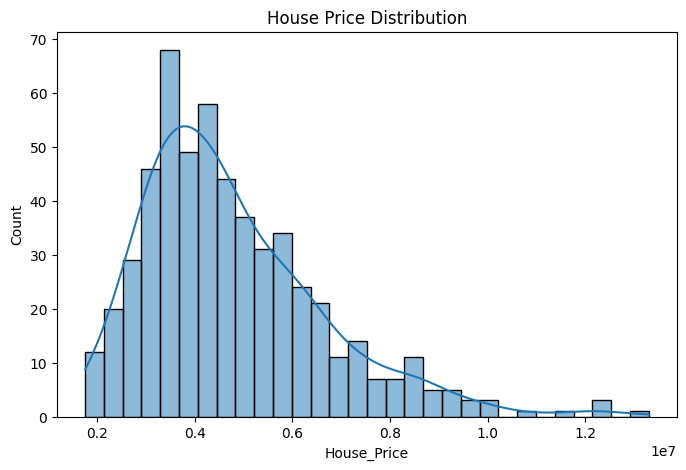

In [77]:
"""
## Step 4: Exploratory Data Analysis (EDA)
"""
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['House_Price'], bins=30, kde=True)
plt.title('House Price Distribution')

- The histogram is positively skewed, meaning most house prices are concentrated in the lower range, and fewer houses have higher prices.

- This indicates that affordable houses are more common, while high-priced houses are relatively rare.

- The highest frequency of houses appears in the 3M–5M price range.

- This suggests that mid-range houses are the most common in this dataset.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

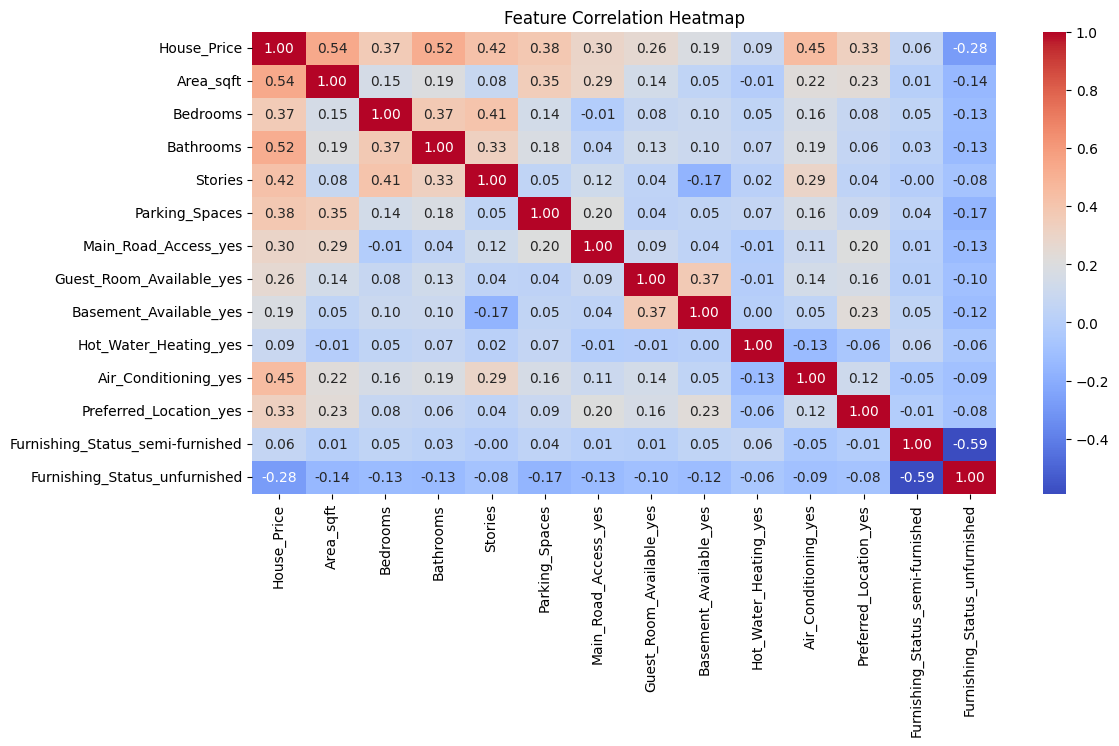

In [78]:

# Add 'House_Price' to X for correlation analysis
X_with_price = X.copy()  # Copy X to avoid modifying the original
X_with_price['House_Price'] = y  # Add target variable back

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(X_with_price.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

#### House Price Correlations:
- House_Price has the strongest correlation with Area_sqft (0.54), Bathrooms (0.52), and Air_Conditioning (0.45). This suggests that larger - houses with more bathrooms and air conditioning tend to have higher prices.

- A negative correlation is seen with Furnishing_Status_unfurnished (-0.28), indicating that unfurnished houses might have lower prices.

- Features like Hot_Water_Heating, Guest_Room_Available, and Basement_Available have weak correlations with most variables, suggesting they don’t significantly impact house prices.

### Model Training 

In [ ]:
"""
## Step 5: Define Features and Target Variable
"""


X = pd.concat([data[numerical_columns].drop(columns=['House_Price'], errors='ignore'), encoded_cats_data], axis=1) # Use this X
y = data[target]  # Target variable

In [80]:
X

,Area_sqft,Bedrooms,Bathrooms,Stories,Parking_Spaces,Main_Road_Access_yes,Guest_Room_Available_yes,Basement_Available_yes,Hot_Water_Heating_yes,Air_Conditioning_yes,Preferred_Location_yes,Furnishing_Status_semi-furnished,Furnishing_Status_unfurnished
0,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Handle outliers 
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

y = np.where(y > upper_limit, upper_limit, y)
y = np.where(y < lower_limit, lower_limit, y)

# Optional: Check the data after handling outliers
print(data['House_Price'].describe())

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: House_Price, dtype: float64


In [82]:
"""
## Step 6: Split the Dataset into train and test
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
X_train.shape, y_train.shape

((436, 13), (436,))

In [84]:
"""
## Step 7: Feature Scaling
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
"""
## Step 8: Train Linear Regression Model
"""
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]], shape=(436, 13))

In [86]:
m = model.coef_[0]
c = model.intercept_

In [87]:
# predicted house price
predicted_price = m*X+c
predicted_price

,Area_sqft,Bedrooms,Bathrooms,Stories,Parking_Spaces,Main_Road_Access_yes,Guest_Room_Available_yes,Basement_Available_yes,Hot_Water_Heating_yes,Air_Conditioning_yes,Preferred_Location_yes,Furnishing_Status_semi-furnished,Furnishing_Status_unfurnished
0,3.729194e+09,6.687540e+06,5.683628e+06,6.185584e+06,5.683628e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,5.181672e+06,5.181672e+06,4.679715e+06,4.679715e+06
1,4.502206e+09,6.687540e+06,6.687540e+06,6.687540e+06,6.185584e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06
2,5.004162e+09,6.185584e+06,5.683628e+06,5.683628e+06,5.683628e+06,5.181672e+06,4.679715e+06,5.181672e+06,4.679715e+06,4.679715e+06,5.181672e+06,5.181672e+06,4.679715e+06
3,3.769350e+09,6.687540e+06,5.683628e+06,5.683628e+06,6.185584e+06,5.181672e+06,4.679715e+06,5.181672e+06,4.679715e+06,5.181672e+06,5.181672e+06,4.679715e+06,4.679715e+06
4,3.729194e+09,6.687540e+06,5.181672e+06,5.683628e+06,5.683628e+06,5.181672e+06,5.181672e+06,5.181672e+06,4.679715e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.510548e+09,5.683628e+06,5.181672e+06,5.181672e+06,5.683628e+06,5.181672e+06,4.679715e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,5.181672e+06
541,1.209374e+09,6.185584e+06,5.181672e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,5.181672e+06,4.679715e+06
542,1.821761e+09,5.683628e+06,5.181672e+06,5.181672e+06,4.679715e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,5.181672e+06
543,1.465372e+09,6.185584e+06,5.181672e+06,5.181672e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06,4.679715e+06


In [88]:
"""
## Step 9: Make Predictions
"""
y_pred = model.predict(X_test)

# Print the predicted prices
# print("Predicted Prices:", y_pred)

Text(0.5, 1.0, 'Actual vs Predicted Price')

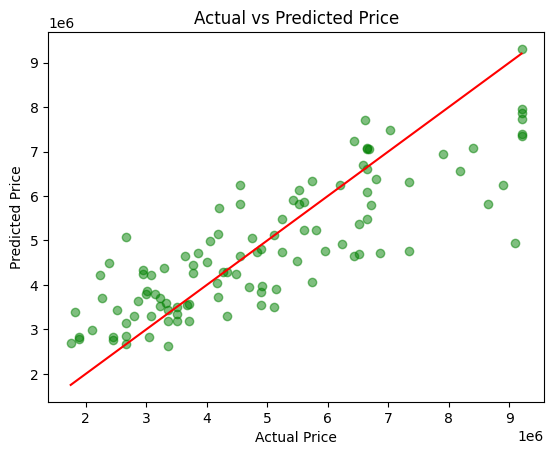

In [89]:
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

### Model Evaluation

In [90]:
"""
## Step 10: Evaluate the Model
"""
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R-squared: {r2:,.4f}")


Mean Absolute Error: 869,709.60
Mean Squared Error: 1,275,852,327,984.67
Root Mean Squared Error: 1,129,536.33
R-squared: 0.6842


In [101]:
import joblib

joblib.dump(model,'C:/Users/User/house_price_prediction/notebook/house_price_pred.pkl')
joblib.dump(encoder,'C:/Users/User/house_price_prediction/notebook/onehot_encoder.pkl')
joblib.dump(scaler, 'C:/Users/User/house_price_prediction/notebook/standard_scaler.pkl')

print("Model saved successfully.")

Model saved successfully.


In [102]:
#load the model
model_path = 'C:/Users/User/house_price_prediction/notebook/house_price_pred.pkl'
encoder_path = 'C:/Users/User/house_price_prediction/notebook/onehot_encoder.pkl'
scaler_path = "C:/Users/User/house_price_prediction/notebook/standard_scaler.pkl"

model = joblib.load(model_path)
encoder = joblib.load(encoder_path)
scaler = joblib.load(scaler_path)

In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load models and scaler
model_path = "C:/Users/User/house_price_prediction/notebook/house_price_pred.pkl"
encoder_path = "C:/Users/User/house_price_prediction/notebook/onehot_encoder.pkl"
scaler_path = "C:/Users/User/house_price_prediction/notebook/standard_scaler.pkl"  

model = joblib.load(model_path)
encoder = joblib.load(encoder_path)
scaler = joblib.load(scaler_path)  

# Create a new sample data
# New house input data
new_house = pd.DataFrame([{
    "Area_sqft": 5000,
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Stories": 2,
    "Parking_Spaces": 1,
    "Main_Road_Access": "yes",
    "Guest_Room_Available": "no",
    "Basement_Available": "no",
    "Hot_Water_Heating": "no",
    "Air_Conditioning": "yes",
    "Preferred_Location": "yes",
    "Furnishing_Status": "semi-furnished"
}])

# Define numerical and categorical columns
numerical_columns = ['Area_sqft', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking_Spaces']  # Numerical features
categorical_columns = new_house.select_dtypes(include=['object']).columns  # Categorical features

# Apply the same OneHotEncoder used during training
new_house_cat = encoder.transform(new_house[categorical_columns])  # Use the same encoder
new_house_cat_df = pd.DataFrame(new_house_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Combine numerical and encoded categorical features
new_house_final = pd.concat([new_house[numerical_columns], new_house_cat_df], axis=1)

# Apply the same StandardScaler used during training
new_house_final_scaled = scaler.transform(new_house_final)  # Scale the new data

# Make prediction
new_house_price = model.predict(new_house_final_scaled)
print(f"Predicted house price: ${new_house_price[0]:,.2f}")

Predicted house price: $6,431,159.43
